In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("info/car_review.csv")
df.head()

,Brand,Model,Drive,Quality of interior,Infotainment system,Comfort,Performance,Handling,Practicality,Reliability,Safety,Quality of construction,Noise,Engine,Price,Overall
0,MG,MG3,Positive,Medium,Positive,Not mentioned,Positive,Positive,Negative,Not mentioned,Not mentioned,Medium,Not mentioned,Positive,16995.0,8.0
1,MG,HS,Medium,Negative,Negative,Positive,Medium,Negative,Positive,Not mentioned,Not mentioned,Negative,Medium,Positive,25995.0,7.0
2,MG,Cyberster,Not mentioned,Positive,Negative,Positive,Positive,Medium,Positive,Not mentioned,Not mentioned,Positive,Negative,Not mentioned,54995.0,7.0
3,MG,ZS,Positive,Medium,Positive,Negative,Medium,Positive,Positive,Not mentioned,Negative,Not mentioned,Negative,Medium,18605.0,6.0
4,MG,MG4 EV,Positive,Medium,Negative,Positive,Positive,Positive,Mixed,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Positive,26995.0,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    203 non-null    object 
 1   Model                    203 non-null    object 
 2   Drive                    203 non-null    object 
 3   Quality of interior      203 non-null    object 
 4   Infotainment system      203 non-null    object 
 5   Comfort                  203 non-null    object 
 6   Performance              203 non-null    object 
 7   Handling                 203 non-null    object 
 8   Practicality             203 non-null    object 
 9   Reliability              203 non-null    object 
 10  Safety                   203 non-null    object 
 11  Quality of construction  203 non-null    object 
 12  Noise                    203 non-null    object 
 13  Engine                   203 non-null    object 
 14  Price                    2

In [5]:
## Visualizzazione dei brand

print(df['Brand'].unique())

['MG' 'OMODA' 'Volkswagen' 'Dacia' 'Fiat' 'Renault' 'Citroen' 'BMW'
 'Peugeot' 'BYD' 'GWM' 'Haval' 'Jaecoo' 'Leapmotor' 'Xpeng']


In [6]:
## Visualizzazione dei modelli

modelli_due = df['Model'].value_counts()[df['Model'].value_counts() == 2].index
df[df['Model'].isin(modelli_due)]

,Brand,Model,Drive,Quality of interior,Infotainment system,Comfort,Performance,Handling,Practicality,Reliability,Safety,Quality of construction,Noise,Engine,Price,Overall
3,MG,ZS,Positive,Medium,Positive,Negative,Medium,Positive,Positive,Not mentioned,Negative,Not mentioned,Negative,Medium,18605.0,6.0
9,MG,ZS,Positive,Negative,Medium,Positive,Positive,Medium,Positive,Not mentioned,Not mentioned,Not mentioned,Negative,Positive,19995.0,8.0
179,Peugeot,508,Positive,Positive,Positive,Medium,Positive,Not mentioned,Negative,Not mentioned,Positive,Positive,Negative,Positive,27999.0,7.0
180,Peugeot,508,Positive,Medium,Positive,Negative,Positive,Positive,Not mentioned,Not mentioned,Not mentioned,Medium,Not mentioned,Positive,46920.0,6.0
188,Peugeot,5008,Medium,Positive,Positive,Positive,Negative,Negative,Positive,Not mentioned,Not mentioned,Positive,Not mentioned,Positive,39490.0,8.0
189,Peugeot,5008,Medium,Positive,Positive,Positive,Negative,Negative,Positive,Not mentioned,Not mentioned,Positive,Not mentioned,Positive,39490.0,8.0


In [7]:
# Per ogni modello che compare due o più volte, teniamo solo quello più costoso
for modello in modelli_due:
    idx_min_price = df[df['Model'] == modello]['Price'].idxmin()
    df = df.drop(idx_min_price)

In [8]:
# Conversione prezzi da £ a €
# Tasso di cambio approssimativo GBP/EUR (giugno 2025): 1 GBP ≈ 1.17 EUR
tasso_cambio_gbp_eur = 1.17

# Converto i prezzi da sterline a euro
df['Price_EUR'] = round((df['Price'] * tasso_cambio_gbp_eur), 2)

# Sostituisco la colonna originale con quella convertita
df['Price'] = df['Price_EUR']
df = df.drop('Price_EUR', axis=1)

print("Conversione prezzi da £ a € completata!")
print(f"Tasso di cambio utilizzato: 1 GBP = {tasso_cambio_gbp_eur} EUR")
print(f"\nEsempi di prezzi convertiti:")
print(df[['Brand', 'Model', 'Price']].head())

Conversione prezzi da £ a € completata!
Tasso di cambio utilizzato: 1 GBP = 1.17 EUR

Esempi di prezzi convertiti:
  Brand       Model     Price
0    MG         MG3  19884.15
1    MG          HS  30414.15
2    MG   Cyberster  64344.15
4    MG      MG4 EV  31584.15
5    MG  MG4 XPower  42471.00


In [9]:
# Crea la colonna Fascia_Prezzo se non esiste
if 'Fascia_Prezzo' not in df.columns:
    bins = [0, 20000, 40000, 60000, np.inf]
    labels = ['Economica (<20k)', 'Media (20k-40k)', 'Premium (40k-60k)', 'Lusso (>60k)']
    df['Fascia_Prezzo'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

In [11]:
df.columns

Index(['Brand', 'Model', 'Drive', 'Quality of interior', 'Infotainment system',
       'Comfort', 'Performance', 'Handling', 'Practicality', 'Reliability',
       'Safety', 'Quality of construction', 'Noise', 'Engine', 'Price',
       'Overall', 'Fascia_Prezzo'],
      dtype='object')

In [12]:
import sqlite3
import os

# Percorso del database
db_path = '/mnt/c/data/auto_reviews.db'

# Crea la directory se non esiste
os.makedirs(os.path.dirname(db_path), exist_ok=True)

# Connessione al database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Crea la tabella auto_reviews con le colonne corrette
cursor.execute('''
CREATE TABLE IF NOT EXISTS auto_reviews (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Brand TEXT NOT NULL,
    Model TEXT NOT NULL,
    Drive TEXT,
    Quality_of_interior TEXT,
    Infotainment_system TEXT,
    Comfort TEXT,
    Performance TEXT,
    Handling TEXT,
    Practicality TEXT,
    Reliability TEXT,
    Safety TEXT,
    Quality_of_construction TEXT,
    Noise TEXT,
    Engine TEXT,
    Price REAL,
    Overall REAL
)
''')

print("Tabella 'auto_reviews' creata con successo!")

# Inserisci il DataFrame nel database
# Prima rinomino le colonne per compatibilità SQL (rimuovo spazi)
df_db = df.copy()
df_db.columns = df_db.columns.str.replace(' ', '_')

df_db = df_db.drop(columns = ["Fascia_Prezzo"])

# Inserimento dati
df_db.to_sql('auto_reviews', conn, if_exists='replace', index=False)

print(f"Dati inseriti con successo! {len(df_db)} righe inserite.")

# Verifica inserimento
cursor.execute("SELECT COUNT(*) FROM auto_reviews")
count = cursor.fetchone()[0]
print(f"Numero di record nel database: {count}")

# Mostra alcuni record di esempio
cursor.execute("SELECT Brand, Model, Price, Overall FROM auto_reviews LIMIT 5")
sample_data = cursor.fetchall()
print("\nEsempi di dati inseriti:")
for row in sample_data:
    print(f"Brand: {row[0]}, Model: {row[1]}, Price: €{row[2]}, Overall: {row[3]}")

# Chiudi connessione
conn.close()
print(f"\nDatabase salvato in: {db_path}")

Tabella 'auto_reviews' creata con successo!
Dati inseriti con successo! 200 righe inserite.
Numero di record nel database: 200

Esempi di dati inseriti:
Brand: MG, Model: MG3, Price: €19884.15, Overall: 8.0
Brand: MG, Model: HS, Price: €30414.15, Overall: 7.0
Brand: MG, Model: Cyberster, Price: €64344.15, Overall: 7.0
Brand: MG, Model: MG4 EV, Price: €31584.15, Overall: 8.0
Brand: MG, Model: MG4 XPower, Price: €42471.0, Overall: 8.0

Database salvato in: /mnt/c/data/auto_reviews.db


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

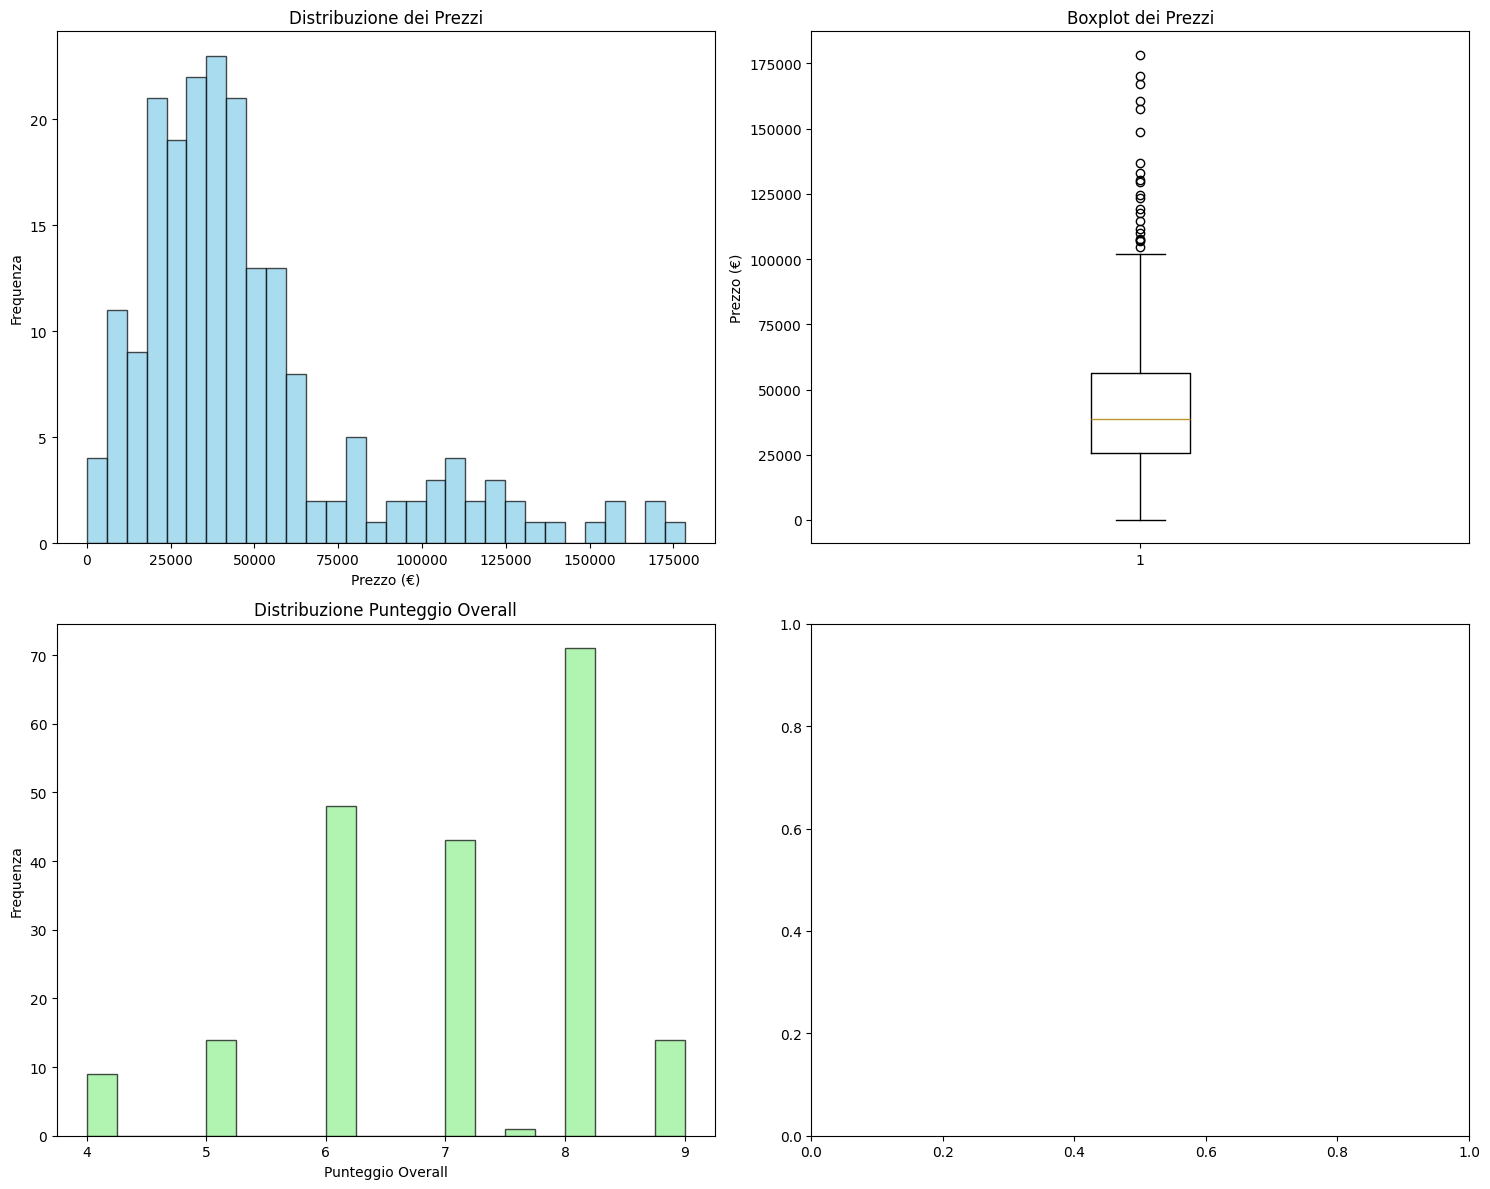

In [14]:
# Configurazione per le visualizzazioni
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 1. Distribuzione dei prezzi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Istogramma dei prezzi
axes[0,0].hist(df['Price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuzione dei Prezzi')
axes[0,0].set_xlabel('Prezzo (€)')
axes[0,0].set_ylabel('Frequenza')

# Boxplot dei prezzi
axes[0,1].boxplot(df['Price'])
axes[0,1].set_title('Boxplot dei Prezzi')
axes[0,1].set_ylabel('Prezzo (€)')

# Distribuzione del punteggio Overall
axes[1,0].hist(df['Overall'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Distribuzione Punteggio Overall')
axes[1,0].set_xlabel('Punteggio Overall')
axes[1,0].set_ylabel('Frequenza')

plt.tight_layout()
plt.show()

/tmp/ipykernel_35912/22831113.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([df_main_brands[df_main_brands['Brand'] == brand]['Price'].values


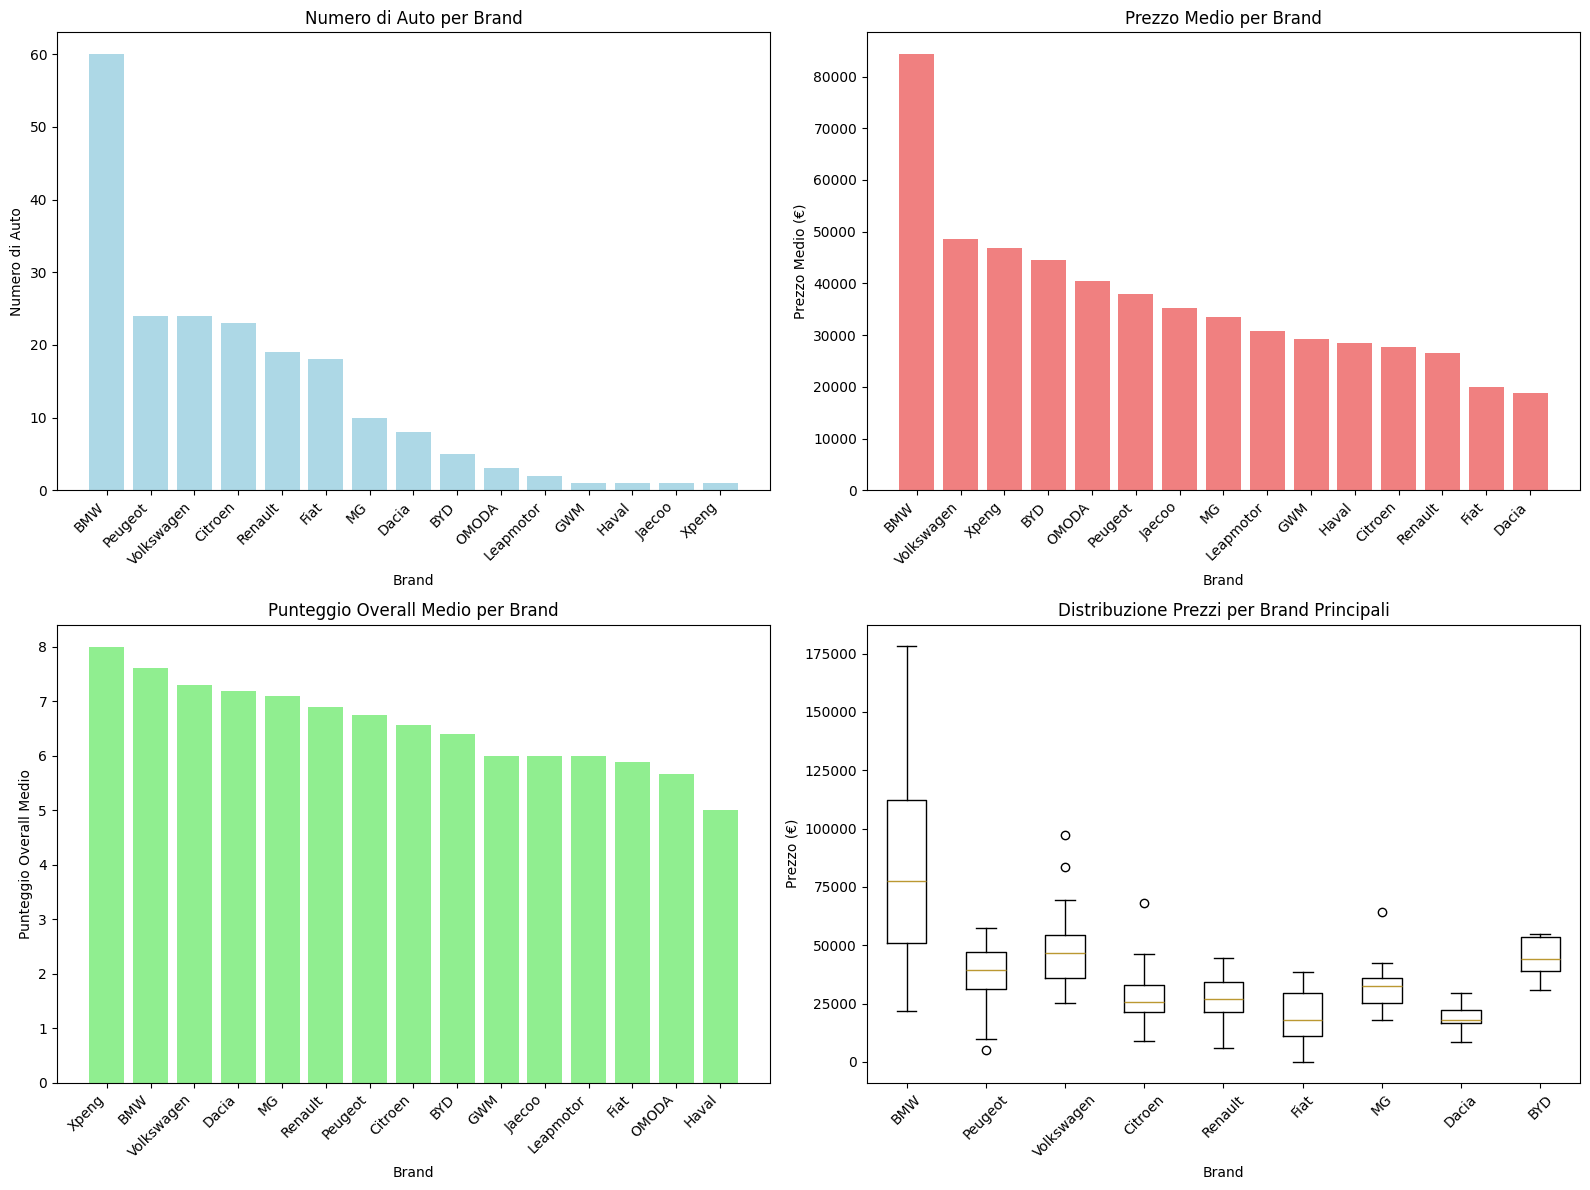

In [15]:
# 2. Analisi per Brand
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Conteggio auto per brand
brand_counts = df['Brand'].value_counts()
axes[0,0].bar(range(len(brand_counts)), brand_counts.values, color='lightblue')
axes[0,0].set_title('Numero di Auto per Brand')
axes[0,0].set_xlabel('Brand')
axes[0,0].set_ylabel('Numero di Auto')
axes[0,0].set_xticks(range(len(brand_counts)))
axes[0,0].set_xticklabels(brand_counts.index, rotation=45, ha='right')

# Prezzo medio per brand
brand_price_mean = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
axes[0,1].bar(range(len(brand_price_mean)), brand_price_mean.values, color='lightcoral')
axes[0,1].set_title('Prezzo Medio per Brand')
axes[0,1].set_xlabel('Brand')
axes[0,1].set_ylabel('Prezzo Medio (€)')
axes[0,1].set_xticks(range(len(brand_price_mean)))
axes[0,1].set_xticklabels(brand_price_mean.index, rotation=45, ha='right')

# Punteggio medio per brand
brand_overall_mean = df.groupby('Brand')['Overall'].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(brand_overall_mean)), brand_overall_mean.values, color='lightgreen')
axes[1,0].set_title('Punteggio Overall Medio per Brand')
axes[1,0].set_xlabel('Brand')
axes[1,0].set_ylabel('Punteggio Overall Medio')
axes[1,0].set_xticks(range(len(brand_overall_mean)))
axes[1,0].set_xticklabels(brand_overall_mean.index, rotation=45, ha='right')

# Boxplot prezzo per i brand principali (con più di 5 auto)
main_brands = brand_counts[brand_counts >= 5].index
df_main_brands = df[df['Brand'].isin(main_brands)]
axes[1,1].boxplot([df_main_brands[df_main_brands['Brand'] == brand]['Price'].values 
                   for brand in main_brands], labels=main_brands)
axes[1,1].set_title('Distribuzione Prezzi per Brand Principali')
axes[1,1].set_xlabel('Brand')
axes[1,1].set_ylabel('Prezzo (€)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

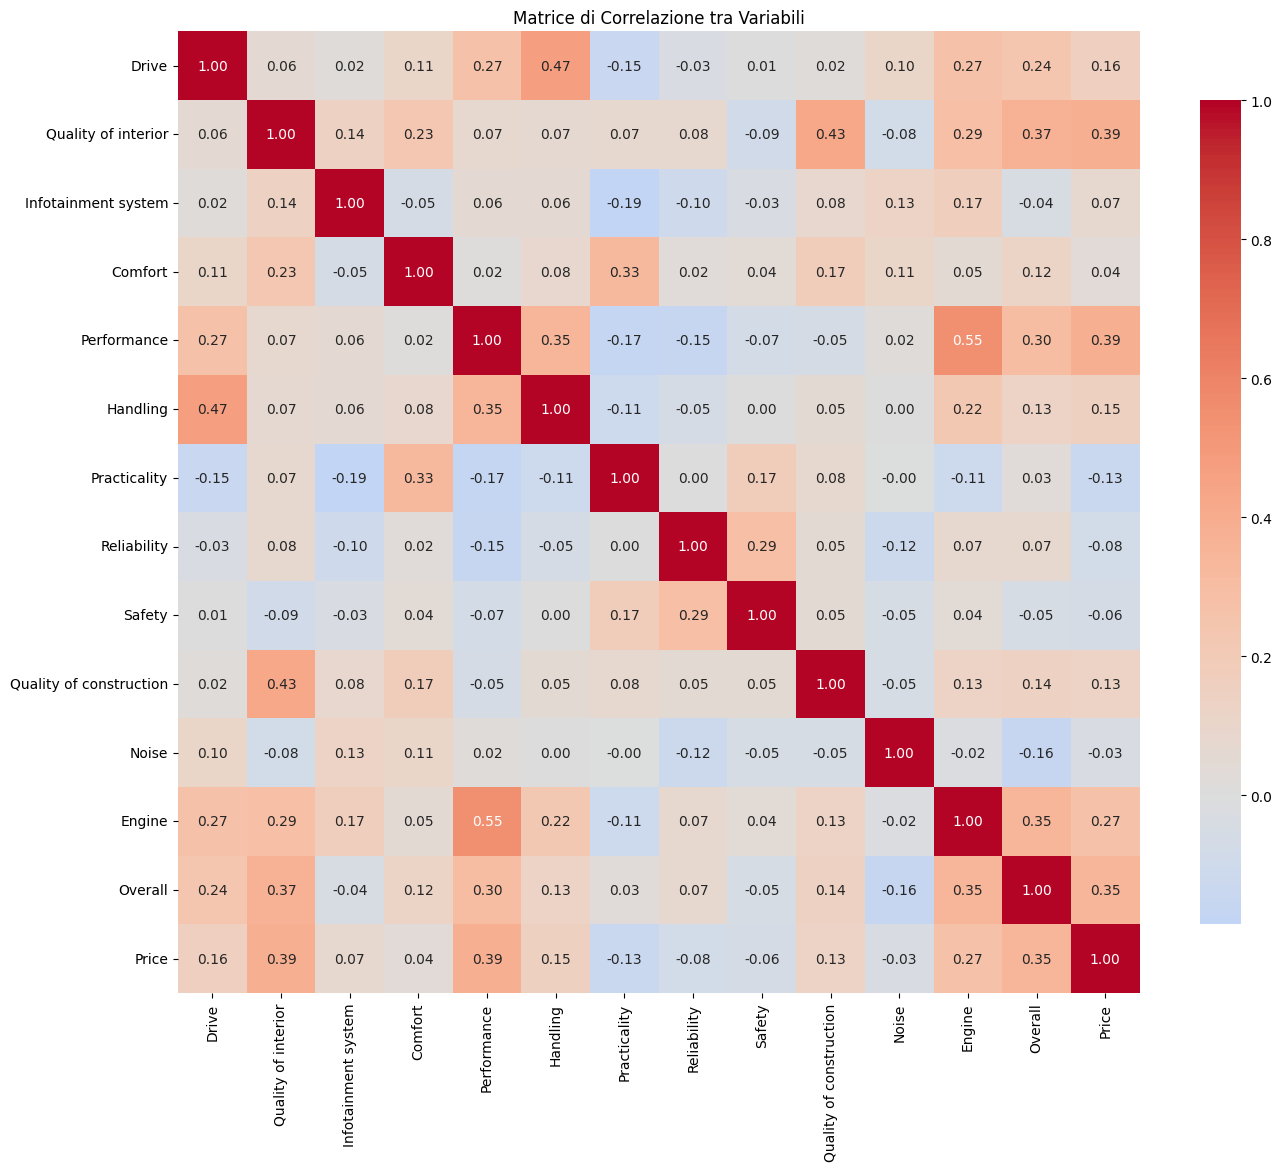

In [16]:
# 3. Heatmap delle correlazioni tra variabili numeriche
# Prima creiamo variabili numeriche per le valutazioni categoriche
categorical_cols = ['Drive', 'Quality of interior', 'Infotainment system', 'Comfort', 
                   'Performance', 'Handling', 'Practicality', 'Reliability', 'Safety',
                   'Quality of construction', 'Noise', 'Engine']

# Mappatura valori categorici a numerici
mapping = {
    'Positive': 3,
    'Medium': 2, 
    'Negative': 1,
    'Not mentioned': 0,
    'Mixed': 1.5,
    'Neutral': 2
}

df_numeric = df.copy()
for col in categorical_cols:
    df_numeric[col] = df_numeric[col].map(mapping)

# Matrice di correlazione
correlation_matrix = df_numeric[categorical_cols + ['Overall', 'Price']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matrice di Correlazione tra Variabili')
plt.tight_layout()
plt.show()

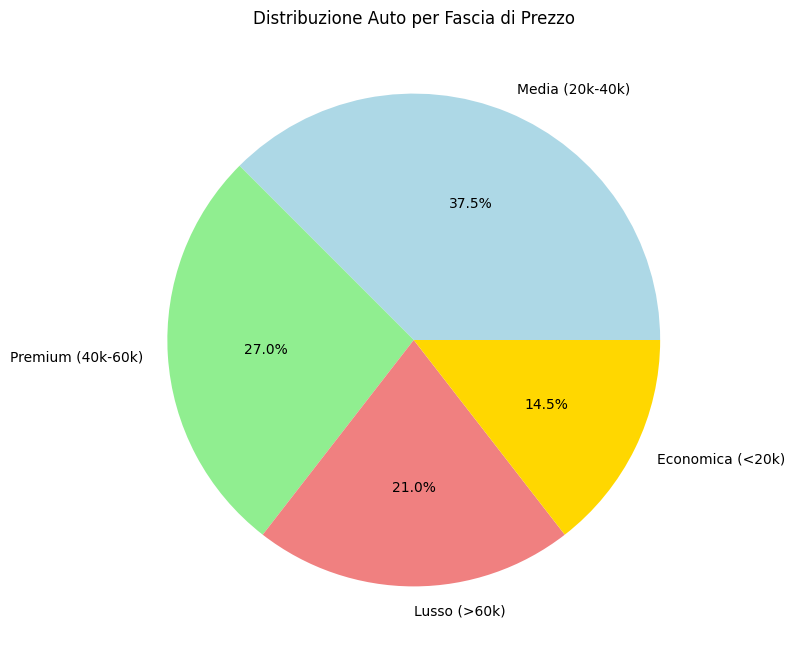

In [17]:
# Distribuzione per fascia di prezzo (grafico a torta)
fascia_counts = df['Fascia_Prezzo'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fascia_counts.values, labels=fascia_counts.index, autopct='%1.1f%%', 
       colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Distribuzione Auto per Fascia di Prezzo')
plt.show()


In [18]:
# 5. Statistiche descrittive
print("=== STATISTICHE DESCRITTIVE ===\n")

print("Prezzo:")
print(f"  Media: €{df['Price'].mean():.2f}")
print(f"  Mediana: €{df['Price'].median():.2f}")
print(f"  Min: €{df['Price'].min():.2f}")
print(f"  Max: €{df['Price'].max():.2f}")
print(f"  Deviazione Standard: €{df['Price'].std():.2f}")

print("\nPunteggio Overall:")
print(f"  Media: {df['Overall'].mean():.2f}")
print(f"  Mediana: {df['Overall'].median():.2f}")
print(f"  Min: {df['Overall'].min():.2f}")
print(f"  Max: {df['Overall'].max():.2f}")

print(f"\nBrand più rappresentato: {df['Brand'].value_counts().index[0]} ({df['Brand'].value_counts().iloc[0]} auto)")
print(f"Brand con prezzo medio più alto: {brand_price_mean.index[0]} (€{brand_price_mean.iloc[0]:.2f})")
print(f"Brand con punteggio medio più alto: {brand_overall_mean.index[0]} ({brand_overall_mean.iloc[0]:.2f})")

# Correlazione prezzo-overall
correlation = df['Price'].corr(df['Overall'])
print(f"\nCorrelazione Prezzo-Overall: {correlation:.3f}")

=== STATISTICHE DESCRITTIVE ===

Prezzo:
  Media: €48353.36
  Mediana: €38522.25
  Min: €4.68
  Max: €178366.50
  Deviazione Standard: €35100.82

Punteggio Overall:
  Media: 6.98
  Mediana: 7.00
  Min: 4.00
  Max: 9.00

Brand più rappresentato: BMW (60 auto)
Brand con prezzo medio più alto: BMW (€84324.98)
Brand con punteggio medio più alto: Xpeng (8.00)

Correlazione Prezzo-Overall: 0.351
